# Applied Quantum Alogirhtms Project 1 - Tim Koreman (2418541)

In this notebook we will run the experiments and make the plots as presented in the main report. Most definitions are in the other .py files. Other dependencies are cirq, openfermion, openfermion-cirq, numpy, scipy and pyplot.

First we import the packages and other python files we need:

In [2]:
import cirq as c
from sympy import Symbol
import numpy as np
import matplotlib.pyplot as plt

import StatePreparation as SP
import OpenFermionBenchmark as OFB
import PlotFunctions as PF
import ExactEigenvectors as EE
import TimeEvolution as TE

Next we define some constants used throughout the rest of the notebook, N being the number of measurements we use in each run of the simulator and U,V and t the parameters of the hamiltonian as defined in main report:

In [3]:
n_measurements = 10**4

u = -7
v = 28
t = 1

## Ground state estimation using Variational Quantum Eigensolver (VQE)

The first thing we want to do is find the lowest energy for the ansatz and hamiltonian as definend in the main report. The function OptimizeVQENM, defined in the StatePreparation.py file, uses the Nelder-Mead algorithm to find a minimum for the ansatz.

It should converge to an energy around -4.3 ~ -4.4 but sometimes it gets stuck in some local minimum.

In [19]:
cutoff_variance = 0.001

optimized_vqe = SP.OptimizeVQENelderMead(u, v, t, n_measurements, cutoff_variance)
minimum_theta = optimized_vqe[0]
minimum_phi = optimized_vqe[1]

Minimum E = -4.355250000000002, at theta = 1.3436326935086527 and phi = 0.6063382690681207 error = 0.4877251139327523.


We can compare the result of our optimizer with the result the built-in VQE optimizer in openfermion achieves:

In [5]:
optimized_vqe_openfermion = OFB.OptimizeVQEOpenFermion(u, v, t)

Minimum E = -4.415192910208072, at theta = 1.4060937419538733 and phi = 0.4755714636186774 error = 0.42778220372468745.


## Ground State Energy Error 

We now check how our the error in our ground state energy (w.r.t. the exact lowest eigenvalue) for varying U,V and t values. (Warning: These plots take quite some time to be generated).

Note. The plots in the report are generated using a higher n_measurements and lower cutoff_variance. They were changed here to be able to demonstrate them without requiring too much time. The results may not be satisfactory here.

First the error for varying U:

In [14]:
n_measurements = 10**3
cutoff_variance = 0.01

Minimum E = -25.373, at theta = 0.4813927441693371 and phi = 6.273228324439872 error = -0.02223126335947967.
Minimum E = -25.499000000000002, at theta = 0.3957588354190632 and phi = 0.005400131387723661 error = -0.1482312633594809.
Minimum E = -25.12, at theta = 0.1786882430997957 and phi = 0.14641117594005637 error = 0.23076873664052044.
Minimum E = -21.5785, at theta = 5.991869956003132 and phi = 1.3032552809135143 error = 3.772268736640523.
Minimum E = -14.444388888888888, at theta = 0.6287385733539768 and phi = 0.11037167114878255 error = 0.17076173256778304.
Minimum E = -13.832166666666668, at theta = 0.3812243626673517 and phi = 0.5871150251630763 error = 0.7829839547900033.
Minimum E = -13.891166666666665, at theta = 0.5962919673498028 and phi = 0.688081602649649 error = 0.7239839547900058.
Minimum E = -14.463833333333332, at theta = 0.9769109012934807 and phi = 0.5066690683417214 error = 0.1513172881233391.
Minimum E = -8.46888888888889, at theta = 1.3021559208421647 and phi = 

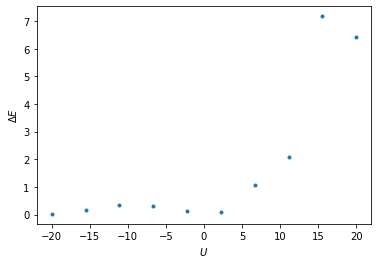

In [12]:
u_sweep = np.linspace(-20,20,10)

results_array = []

for i in range(0, len(u_sweep)):
    temp_array = []
    
    for j in range(0,4): #Run the VQE multiple times at a given setting and find the lowest value to combat local minima.
        optimized_vqe = SP.OptimizeVQENelderMead(u_sweep[i], v, t, n_measurements, cutoff_variance)
        temp_array.append(np.abs(optimized_vqe[3]))
        
    results_array.append( np.amin(temp_array) )
    
plt.plot(u_sweep, results_array, '.')
plt.xlabel(r'$U$')
plt.ylabel(r'$\Delta E$')
plt.savefig('uerror.pdf')

plt.show()

For varying V:

Minimum E = -43.37125, at theta = 0.038296037907564084 and phi = 0.11886073207875825 error = -0.006313643579844097.
Minimum E = -41.093999999999994, at theta = 6.2605150675366295 and phi = 0.44375440797465027 error = 2.2709363564201652.
Minimum E = -43.505500000000005, at theta = 0.05221711382518901 and phi = 0.05004496578414952 error = -0.14056364357984563.
Minimum E = -43.429249999999996, at theta = 0.11830512170569601 and phi = 6.185695363880733 error = -0.06431364357983682.
Minimum E = -36.78491666666666, at theta = 0.13666507303510755 and phi = 0.017725537773409072 error = -0.020935014000805552.
Minimum E = -35.415416666666665, at theta = 6.246906712344818 and phi = 0.3737256076813824 error = 1.3485649859991895.
Minimum E = -36.41525, at theta = 0.1103142684871386 and phi = 0.09132608067194692 error = 0.3487316526658546.
Minimum E = -36.76566666666667, at theta = 0.15287968380744293 and phi = 0.04546106538760064 error = -0.001685014000813112.
Minimum E = -30.22833333333333, at the

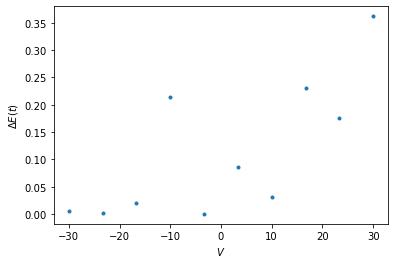

In [15]:
v_sweep = np.linspace(-30,30,10)

results_array = []

for i in range(0, len(v_sweep)):
    temp_array = []
    
    for j in range(0,4): #Run the VQE multiple times at a given setting and find the lowest value to combat local minima.
        optimized_vqe = SP.OptimizeVQENelderMead(u, v_sweep[i], t, n_measurements, cutoff_variance)
        temp_array.append(np.abs(optimized_vqe[3]))
        
    results_array.append( np.amin(temp_array) )
      
plt.plot(v_sweep, results_array, '.')
plt.xlabel(r'$V$')
plt.ylabel(r'$\Delta E (t)$')
plt.savefig('verror.pdf')

plt.show()

For varying t:

Minimum E = -323.5395, at theta = 1.5375259625396254 and phi = 3.1360801173837056 error = 0.04838624679609893.
Minimum E = -323.55999999999995, at theta = 1.5937456563044559 and phi = 3.107456796218536 error = 0.027886246796128944.
Minimum E = -323.342, at theta = 1.5801866935579507 and phi = 3.079289228368254 error = 0.24588624679608984.
Minimum E = -323.591, at theta = 1.557825688836307 and phi = 3.152003201590687 error = -0.003113753203933811.
Minimum E = -252.29905555555555, at theta = 1.5038553792313019 and phi = 3.101020542951404 error = 0.20232426916842883.
Minimum E = -252.07972222222222, at theta = 4.749367191774718 and phi = 0.05625083970522127 error = 0.4216576025017673.
Minimum E = -252.34572222222224, at theta = 4.675167124498065 and phi = 6.225092172510796 error = 0.15565760250174776.
Minimum E = -252.469, at theta = 4.646081693481596 and phi = 6.198327283416587 error = 0.03237982472398926.
Minimum E = -181.09999999999997, at theta = 1.5301043816498612 and phi = 3.1880356

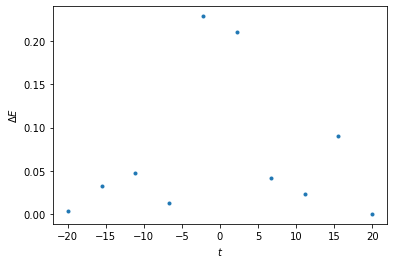

In [16]:
t_sweep = np.linspace(-20,20,10)

results_array = []

for i in range(0, len(t_sweep)):
    temp_array = []
    
    for j in range(0,4):  #Run the VQE multiple times at a given setting and find the lowest value to combat local minima.
        optimized_vqe = SP.OptimizeVQENelderMead(u, v, t_sweep[i], n_measurements, cutoff_variance)
        temp_array.append(np.abs(optimized_vqe[3]))
        
    results_array.append( np.amin(temp_array) )
    
plt.plot(t_sweep, results_array, '.')
plt.xlabel(r'$t$')
plt.ylabel(r'$\Delta E$')

plt.savefig('terror.pdf')
plt.show()

In [17]:
n_measurements = 10**4 #set n_measurements back to the default value.

## Single Trotterstep Time Evolution

Next we prepare a state using the ansatz and the previously found minimal parameters and look at the time evolution of this state under the Hamiltonian by using single step trotterization (ie. we evolve to a time t by using a single operator evolving directly to time t).

In order we evaluate this time evolution we look at the three body contactfunction as defined in the main report to be the expectation value to find all three particles at the same site, ie. the state 0000.

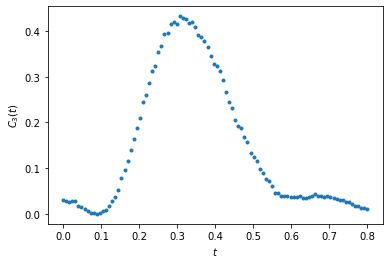

In [6]:
PF.PlotThreeBodyContact(u,v,t, minimum_theta, minimum_phi, 0, 0.8, 100, n_measurements, 1,'gates','ansatz')

## Multi Trotterstep Time Evolution

Now we look at the same problem instead this time using multiple trotter steps to get to time t, ie. say we want to use 3 steps we would evolve by t/3 three times in a row.

We again look at the three body contact function for three different number of trottersteps.

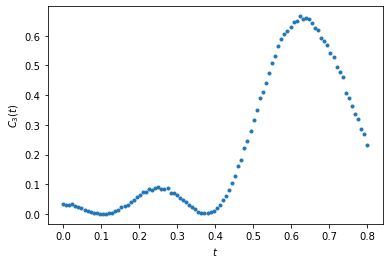

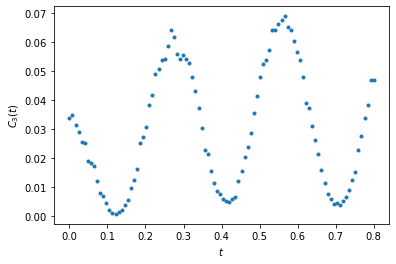

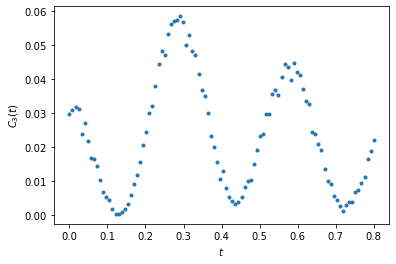

In [7]:
PF.PlotThreeBodyContact(u,v,t, minimum_theta, minimum_phi, 0, 0.8, 100, n_measurements, 2, 'gates','ansatz')
PF.PlotThreeBodyContact(u,v,t, minimum_theta, minimum_phi, 0, 0.8, 100, n_measurements, 5, 'gates','ansatz')
PF.PlotThreeBodyContact(u,v,t, minimum_theta, minimum_phi, 0, 0.8, 100, n_measurements, 10, 'gates','ansatz')

Which deviates significantly with the single trotter step time evolution. In order to evaluate whether this could be due to the extra trotter error in the single time step evolution we compare our results with the evolution with matrix exponential of the Hamiltonian as performed by numpy.

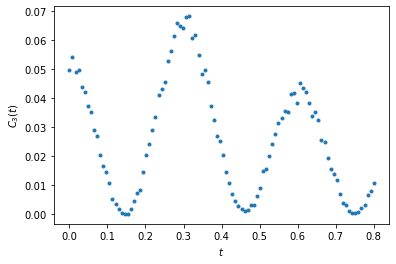

In [3]:
PF.PlotThreeBodyContact(u,v,t, 1.4, 0.4, 0, 0.8, 100, n_measurements, 1,'exact', 'ansatz')

And compare this with the numpy matrix exonential of the hamiltonian terms individually:

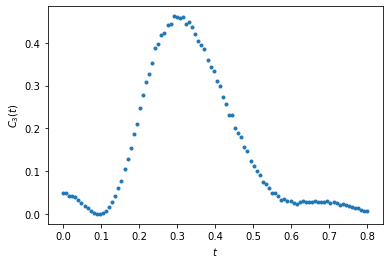

In [5]:
PF.PlotThreeBodyContact(u,v,t, 1.4, 0.4, 0, 0.8, 100, n_measurements, 1, 'trotterexact', 'ansatz')

From this we expect that the difference between the single and multi trotter evolution is due to the error in single trotter evolution.

## Ground State using Quantum Phase Estimation

We now use the QPE algorithm to approximate a ground state, we begin at the ground state we found earlier and apply the QPE to that. We first plot a phase historgram for the run:

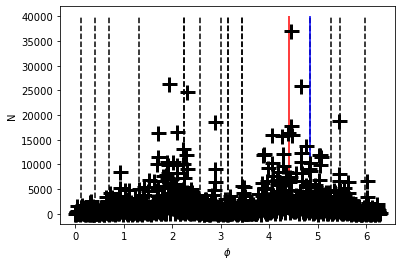

In [6]:
n_ancilla = 10
n_measurements = 2 * 10**6

qubits = [c.LineQubit(0), c.LineQubit(1), c.LineQubit(2), c.LineQubit(3)]

circ = c.Circuit()
circ.append(SP.QPEStatePreparation(1.4060937419538733, 0.4755714636186774, qubits, n_ancilla, u, v, t, 1.0))

simulator = c.Simulator()
result = simulator.run(circ, repetitions=n_measurements)

ancilla_histogram = result.histogram(key='ancilla')

histogram_x = [x / 2**n_ancilla * 2 * np.pi for x in ancilla_histogram]
histogram_y = [ancilla_histogram[x] for x in ancilla_histogram]

plt.plot(histogram_x, histogram_y, 'k+', markersize=15,markeredgewidth=3)

plt.vlines([-x % (2 * np.pi) for x in EE.ExactEigenVectors(u, v, t)[0]],0, 40000, linestyle='dashed', colors ="k")
plt.vlines(-1 * EE.ExactEigenVectors(u, v, t)[0][0],0, 40000, linestyle='solid', colors ="b")
plt.vlines(4.415,0, 40000, linestyle='solid', colors ="r")

plt.xlabel(r'$\phi$')
plt.ylabel(r'N')

plt.savefig('qpe.pdf')

Now we plot the 3 body contact density using the QPE prepartion. First using 1 trotter step:

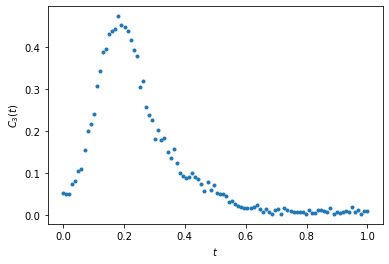

In [8]:
n_ancilla = 10
#n_measurements = 2 * 10**5

PF.PlotThreeBodyContact(u,v,t, 1.4, 0.4, 0, 1.0, 100, n_measurements, 1, 'gates', 'qpe', n_ancilla)

And for 10 trotter steps:

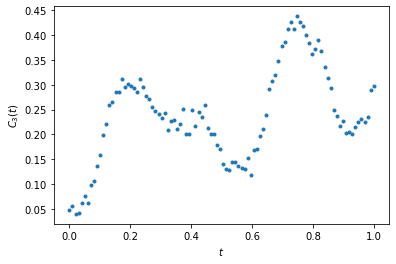

In [9]:
PF.PlotThreeBodyContact(u,v,t, 1.4, 0.4, 0, 1.0, 100, n_measurements, 10, 'gates', 'qpe', n_ancilla)

## Linear Response

Some very rough beginnings on the linear response of the model. Note that this work is not finished.

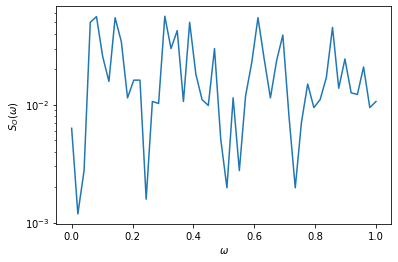

In [4]:
def QPE(qubits, ancillaqubits, U, V,t, DeltaT):               
    for i in range(0, len(ancillaqubits) ):
        yield c.H(ancillaqubits[i])
        
    for i in range(0, len(ancillaqubits) ):  
        #for j in range(0, 2**i):
        yield TE.TrotterizedEvolutionGate(U, V, t, DeltaT * 2**i).controlled()(ancillaqubits[i], *qubits)
            
    yield c.QFT(*ancillaqubits, inverse = True)       
    yield c.measure(*ancillaqubits, key='work') 

W = 6
gamma = 0.1
delta_t = 1
n_measurements =  10**6

qubits = [c.LineQubit(1), c.LineQubit(2), c.LineQubit(3), c.LineQubit(4)]
ancilla_qubit = c.LineQubit(0) 
work_qubits = [c.LineQubit(i) for i in range(5, 5 + W)]

circ = c.Circuit()

# state preparation
circ.append(c.X(ancilla_qubit))

circ.append(c.rz(np.pi /2)(ancilla_qubit))
circ.append(c.H(ancilla_qubit))

circ.append(c.CNOT(qubits[2], ancilla_qubit))
circ.append(c.rz(gamma)(ancilla_qubit))
circ.append(c.CNOT(qubits[2], ancilla_qubit))
circ.append(c.H(ancilla_qubit))
circ.append( c.rz( np.pi * 3/2)(ancilla_qubit) )

circ.append(c.measure(ancilla_qubit, key='ancilla') )

# apply QPE to use the work qubits to estimate S_O
circ.append(QPE(qubits, work_qubits, u, v, t, delta_t))

simulator = c.Simulator()
result = simulator.run(circ, repetitions=n_measurements)

# only keep values where ancilla is in 0 state.
ancilla_values = result.data["ancilla"].values 
indices = np.array(np.where(ancilla_values == 0))[0]

work_values = result.data["work"].values 

work_values = work_values[indices]
length = len(work_values)

# make a histogram for the work values and scale it to the required range.
probs = np.histogram(work_values,50)[0]/length
omega_sweep = np.linspace(0, 1, len(probs))

plt.plot(omegasweep, probs)
plt.yscale("log")

plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_O (\omega)$')
plt.savefig('SO.pdf')

plt.show()